<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT:Zomato Restaurant</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOADING DATASET</span>

In [2]:
#dataframe1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv")
dataframe1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='latin-1')
dataframe1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
dataframe2=pd.read_excel('Country-Code.xlsx')
dataframe2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
dataframe1.keys()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
dataframe1.shape

(9551, 21)

In [6]:
dataframe2.shape

(15, 2)

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">WE HAVE TO PREDICT TWO THINGS </span>

<span style="color:RED;font-size: 15px;font-family: verdana;font-weight: bold ">1. Average Cost for two: REGRESSION PROBLEM</span>

<span style="color:RED;font-size: 15px;font-family: verdana;font-weight: bold ">2. Price range: CLASSIFICATION PROBLEM</span>

In [7]:
merged_df = pd.merge(dataframe1, dataframe2, on='Country Code', how='inner')
merged_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [8]:
merged_df.shape

(9551, 22)

In [9]:
df=merged_df.copy()

In [10]:
df.shape

(9551, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [12]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [13]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [14]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1934,18345780,Curry N' Tandoor,1,Gurgaon,"Shop 41, Huda Market, Sector 46, Near Sector 4...",Sector 45,"Sector 45, Gurgaon",77.059817,28.434507,"Mughlai, North Indian",...,No,No,No,No,2,3.2,Orange,Average,18,India
2552,1600067,Al Arabian Express,1,Nashik,"Near Big Bazar, College Road, Nashik",College Road,"College Road, Nashik",73.765043,20.003734,Mughlai,...,No,No,No,No,3,3.7,Yellow,Good,162,India
576,5704118,Tikka Tonight,214,Abu Dhabi,"Behind RAK Bank, Sanaiya ME11, Mussafah Sanaiy...",Mussafah Sanaiya,"Mussafah Sanaiya, Abu Dhabi",54.510040,24.363130,"Pakistani, Afghani, Indian, Hyderabadi",...,No,Yes,No,No,2,4.0,Green,Very Good,277,UAE
8907,18347548,Hotel Green View Palace,1,Noida,"Plot 16-A, Hotel Green View Palace, Near Indus...",Sector 62,"Sector 62, Noida",77.354751,28.617504,"North Indian, Chinese, South Indian",...,No,No,No,No,2,0.0,White,Not rated,0,India
7169,18423870,South Cafe,1,New Delhi,"Shop 4/460, Near Durgapuri Chowk, Shahdara, Ne...",Shahdara,"Shahdara, New Delhi",77.291946,28.690220,"Fast Food, South Indian",...,No,No,No,No,1,0.0,White,Not rated,1,India


In [15]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [16]:
df.keys()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [17]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [18]:
df.isin(['?']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">IDENTIFYING CATEGORICAL DATA</span>

In [19]:
for i in df.columns:
    if df[i].dtypes=='O':
        #print (i)
        print (f"Column name: {i} having unique numbers {df[i].nunique()}")

Column name: Restaurant Name having unique numbers 7446
Column name: City having unique numbers 141
Column name: Address having unique numbers 8918
Column name: Locality having unique numbers 1208
Column name: Locality Verbose having unique numbers 1265
Column name: Cuisines having unique numbers 1825
Column name: Currency having unique numbers 12
Column name: Has Table booking having unique numbers 2
Column name: Has Online delivery having unique numbers 2
Column name: Is delivering now having unique numbers 2
Column name: Switch to order menu having unique numbers 1
Column name: Rating color having unique numbers 6
Column name: Rating text having unique numbers 6
Column name: Country having unique numbers 15


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">IDENTIFYING INTEGER AND FLOAT DATA</span>

In [20]:
for i in df.columns:
    if df[i].dtypes in ['int64', 'float64']:
        print(f"Column name: {i} has {df[i].nunique()} unique values.")


Column name: Restaurant ID has 9551 unique values.
Column name: Country Code has 15 unique values.
Column name: Longitude has 8120 unique values.
Column name: Latitude has 8677 unique values.
Column name: Average Cost for two has 140 unique values.
Column name: Price range has 4 unique values.
Column name: Aggregate rating has 33 unique values.
Column name: Votes has 1012 unique values.


In [21]:
df.keys()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [22]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [23]:
df.corr()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Restaurant ID,1.000000,0.148471,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Country Code,0.148471,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.226081,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,-0.052081,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,-0.001693,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,-0.134540,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,-0.326212,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,-0.147023,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


In [24]:
df1=df.copy()

In [25]:
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">IMPUTATION</span>


In [26]:
# Calculate the mode of the 'cuisine' column
mode_values = df1['Cuisines'].mode()

# Check if mode_values is not None before using subscript notation
if mode_values is not None and not mode_values.empty:
    mode_value = mode_values[0]
    df1['Cuisines'] = df1['Cuisines'].fillna(mode_value)
else:
    # Handle the case where mode_values is None or empty
    print("Mode calculation resulted in None or an empty DataFrame.")


In [27]:
df1.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:CORRELATION</span>

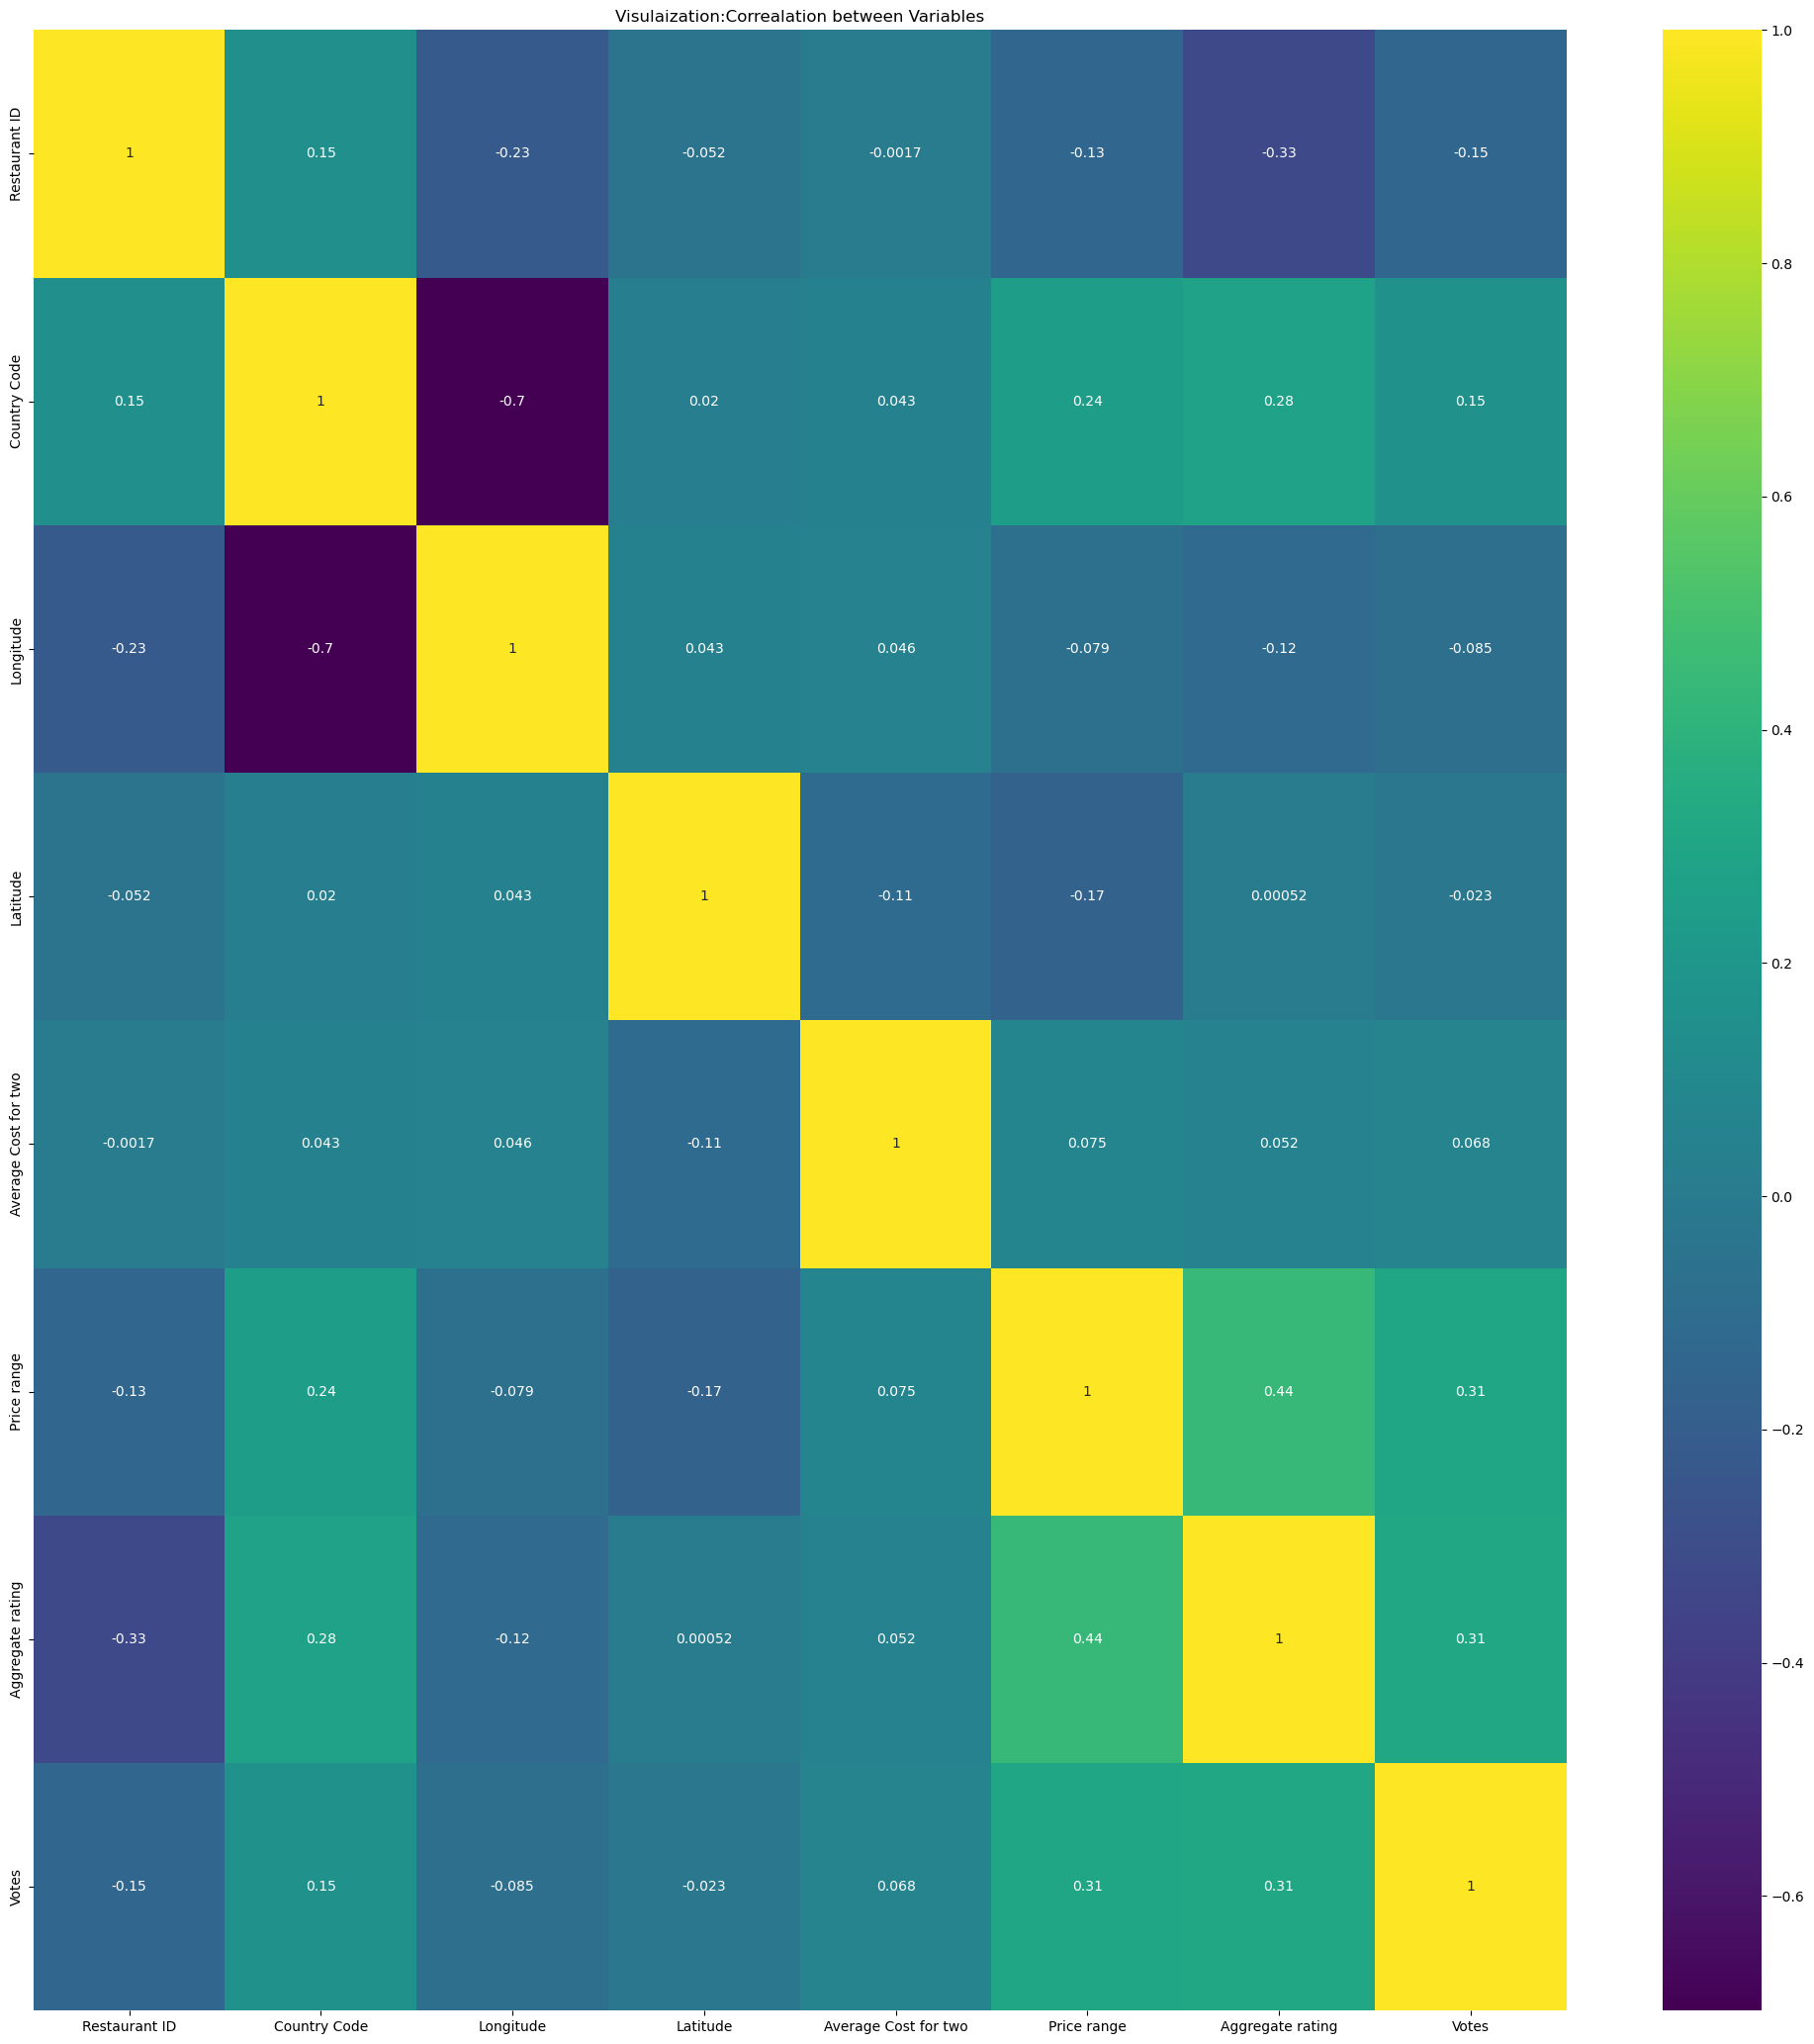

In [28]:
plt.figure(figsize=(25,26), facecolor='w')
sns.heatmap(df1.corr(), annot=True, cmap='viridis')
plt.title("Visulaization:Correalation between Variables")
plt.show()

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">FEATURE SELECTION </span>

In [29]:
columns_to_drop=['Longitude', 'Latitude']
df1 = df1.drop(columns=columns_to_drop)
df1.shape

(9551, 20)

In [30]:
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul","World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul","Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [31]:
for i in df.columns:
    if df[i].dtypes=='O':
        #print (i)
        print (f"Column name: {i} having unique numbers {df[i].nunique()}")

Column name: Restaurant Name having unique numbers 7446
Column name: City having unique numbers 141
Column name: Address having unique numbers 8918
Column name: Locality having unique numbers 1208
Column name: Locality Verbose having unique numbers 1265
Column name: Cuisines having unique numbers 1825
Column name: Currency having unique numbers 12
Column name: Has Table booking having unique numbers 2
Column name: Has Online delivery having unique numbers 2
Column name: Is delivering now having unique numbers 2
Column name: Switch to order menu having unique numbers 1
Column name: Rating color having unique numbers 6
Column name: Rating text having unique numbers 6
Column name: Country having unique numbers 15


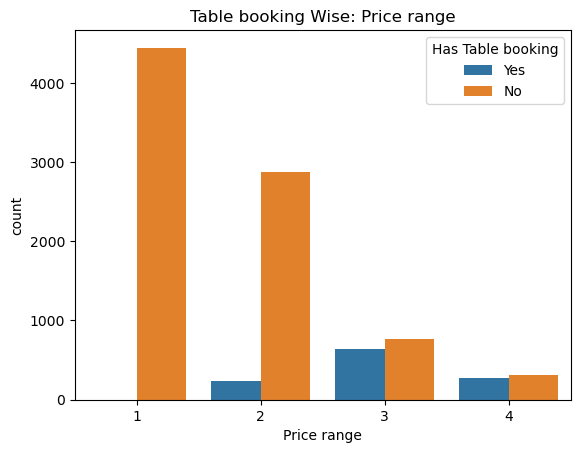

In [32]:
sns.countplot(x='Price range', hue='Has Table booking', data=df1)
plt.title('Table booking Wise: Price range')
plt.show()

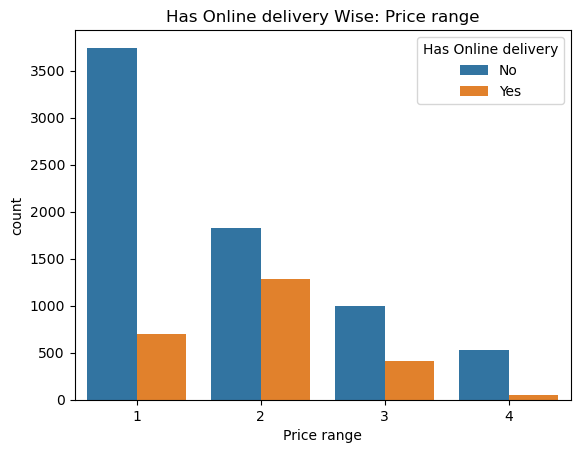

In [33]:
sns.countplot(x='Price range', hue='Has Online delivery', data=df1)
plt.title('Has Online delivery Wise: Price range')
plt.show()

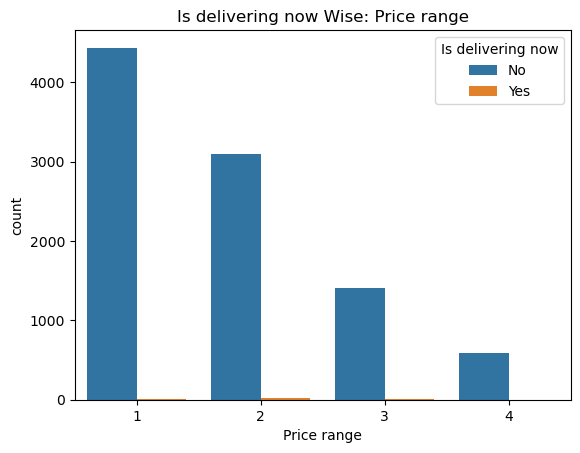

In [34]:
sns.countplot(x='Price range', hue='Is delivering now', data=df1)
plt.title('Is delivering now Wise: Price range')
plt.show()

In [35]:
columns_to_drop=['Switch to order menu']
df1 = df1.drop(columns=columns_to_drop)
df1.shape

(9551, 19)

In [36]:

columns_to_drop=['Rating color']
df1 = df1.drop(columns=columns_to_drop)
df1.shape

(9551, 18)

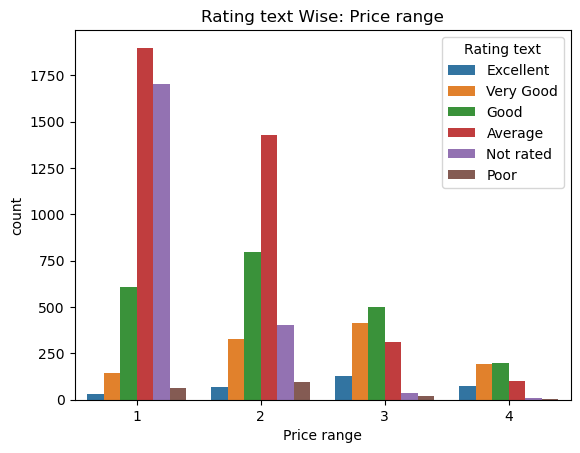

In [37]:
sns.countplot(x='Price range', hue='Rating text', data=df1)
plt.title('Rating text Wise: Price range')
plt.show()

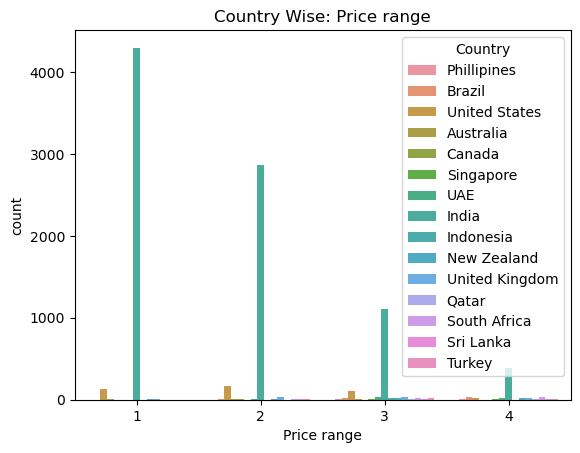

In [38]:
sns.countplot(x='Price range', hue='Country', data=df1)
plt.title('Country Wise: Price range')
plt.show()

In [39]:
df2=df

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING SKEWNESS </span>

In [40]:
df1.skew()

Restaurant ID            0.061570
Country Code             3.043965
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">CORRECTING SKEWNESS: BOX COX TRANSFORMATION </span>

In [41]:
from scipy.stats import boxcox

for i in df1.columns:
    if df1[i].dtypes in ['int64', 'float64']:
        skewness = df1[i].skew()

        if skewness > 0.5:
            # Add a constant to make the data positive
            min_value = df1[i].min()
            if min_value <= 0:
                constant = abs(min_value) + 1
                df1[i] = df1[i] + constant
            
            # Apply Box-Cox transformation
            df1[i], _ = boxcox(df1[i])


In [42]:
df1.skew()

Restaurant ID           0.061570
Country Code            2.780355
Average Cost for two    0.142365
Price range             0.142564
Aggregate rating       -0.954130
Votes                  -0.004029
dtype: float64

In [43]:
df.skew()

Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION:AFTER CORRECTION OF SKEWNESS </span>

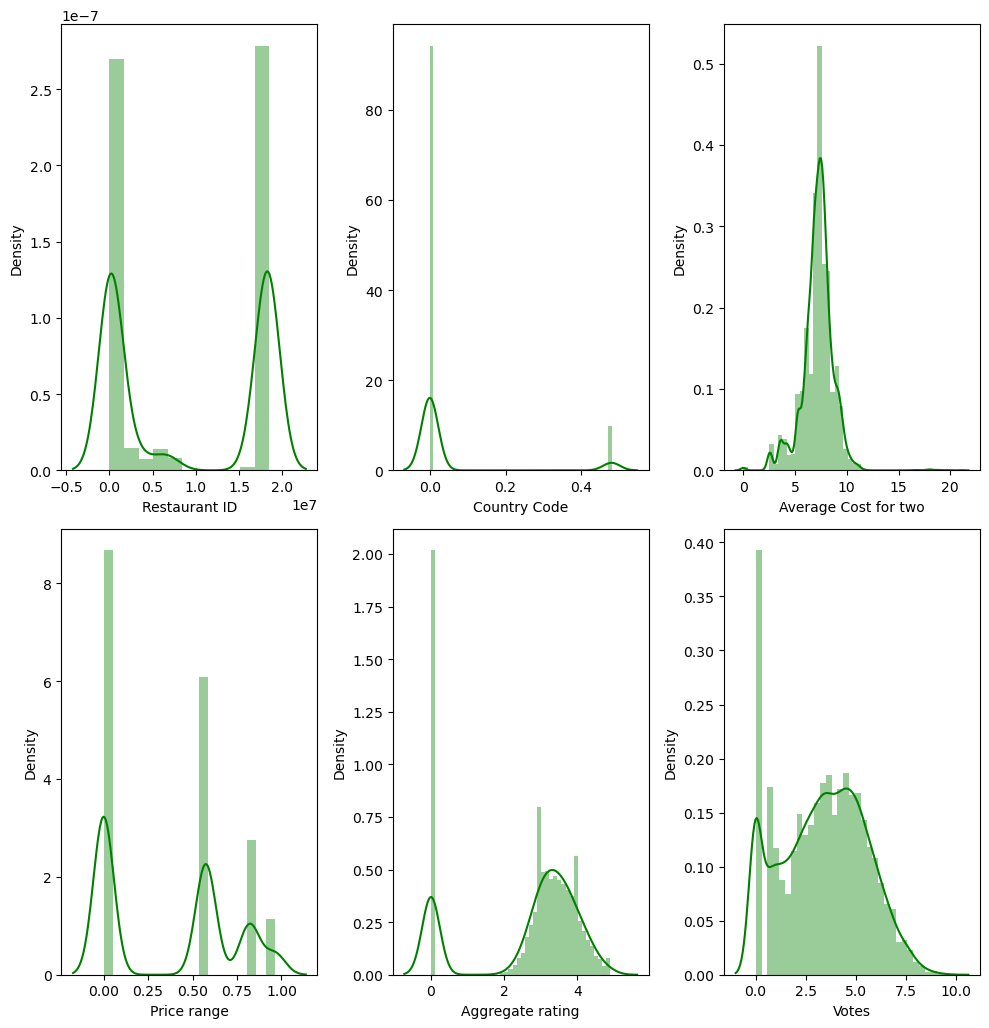

In [44]:
plt.figure(figsize=(10, 15), facecolor='w')
pltnum = 1

for i in df1.columns:
        if df1[i].dtypes in ['int64', 'float64']:  
 
            if pltnum < 8:
                plt.subplot(3, 3, pltnum)
                sns.distplot(df1[i], color='g')
                plt.xlabel(i)
                pltnum += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION:OUTLIERS: BOXPLOTS </span>

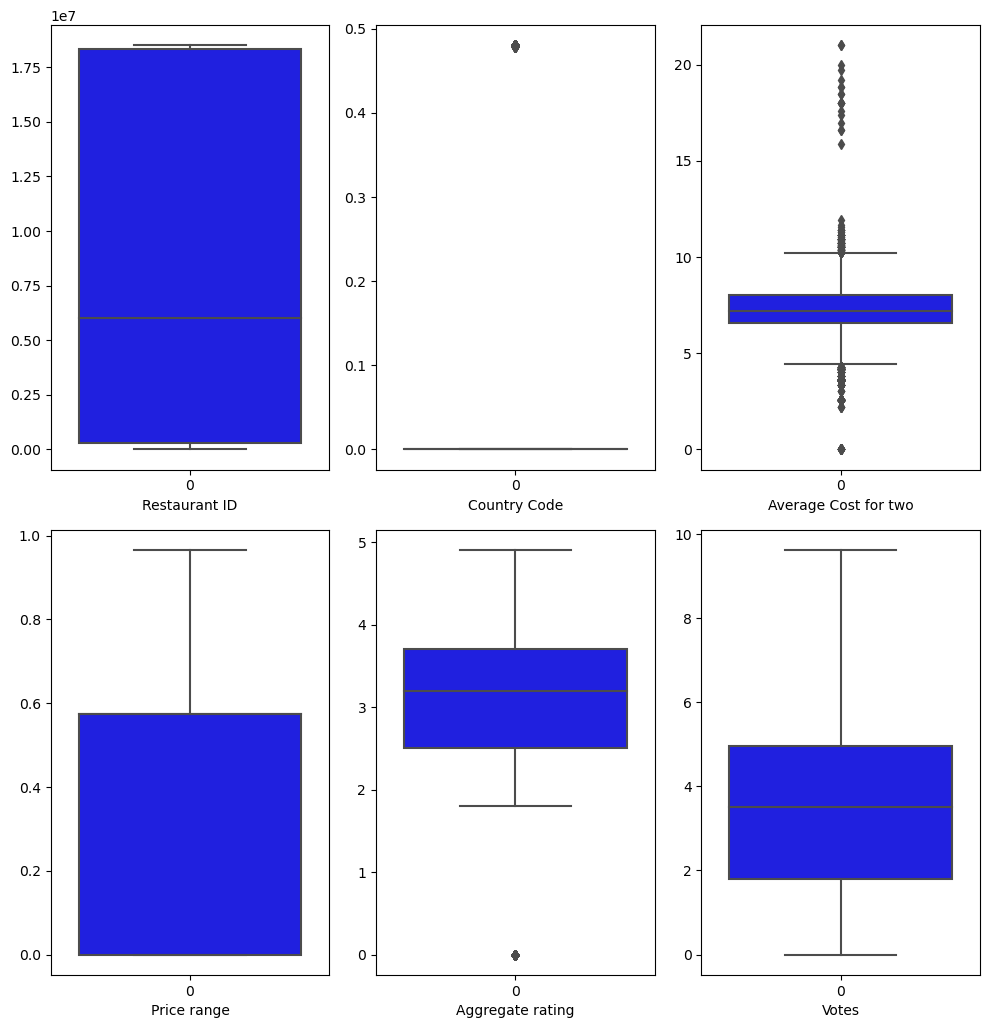

In [45]:
plt.figure(figsize=(10, 15), facecolor='w')
pltnum = 1

for i in df1.columns:
        if df1[i].dtypes in ['int64', 'float64']:  
 
            if pltnum < 8:
                plt.subplot(3, 3, pltnum)
                sns.boxplot(df1[i], color='b')
                plt.xlabel(i)
                pltnum += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [46]:
from scipy.stats import zscore

# Iterate over columns in the DataFrame
for i in df1.columns:
    # Check if the column is of type 'int64' or 'float64'
    if df1[i].dtypes in ['int64', 'float64']:
        # Calculate z-scores for the current column
        z_score = zscore(df1[i])
        
        # Identify and filter out outliers using z-scores
        outliers = (np.abs(z_score) > 3)
        df1 = df1[~outliers]

# Display the DataFrame after removing outliers
print(df1)


      Restaurant ID                        Restaurant Name  Country Code  \
624         3400025                             Jahanpanah           0.0   
625         3400341                    Rangrezz Restaurant           0.0   
626         3400005                Time2Eat - Mama Chicken           0.0   
627         3400021  Chokho Jeeman Marwari Jain Bhojanalya           0.0   
628         3400017                         Pinch Of Spice           0.0   
...             ...                                    ...           ...   
9271        2800100                               D Cabana           0.0   
9272        2800418                               Kaloreez           0.0   
9273        2800881                                Plot 17           0.0   
9274        2800042                       Vista - The Park           0.0   
9275        2800019               Flying Spaghetti Monster           0.0   

       City                                            Address  \
624    Agra  E 23, Sh

In [47]:
df2=df1.copy()

In [48]:
df2.shape

(8601, 18)

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">IMPLEMENTATION OF LABEL ENCODING</span>

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8601 entries, 624 to 9275
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8601 non-null   int64  
 1   Restaurant Name       8601 non-null   object 
 2   Country Code          8601 non-null   float64
 3   City                  8601 non-null   object 
 4   Address               8601 non-null   object 
 5   Locality              8601 non-null   object 
 6   Locality Verbose      8601 non-null   object 
 7   Cuisines              8601 non-null   object 
 8   Average Cost for two  8601 non-null   float64
 9   Currency              8601 non-null   object 
 10  Has Table booking     8601 non-null   object 
 11  Has Online delivery   8601 non-null   object 
 12  Is delivering now     8601 non-null   object 
 13  Price range           8601 non-null   float64
 14  Aggregate rating      8601 non-null   float64
 15  Rating text        

In [50]:
columns_to_drop=['Locality']
df2 = df2.drop(columns=columns_to_drop)

In [51]:
df2.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
7997,1918,Gopala,0.0,New Delhi,"1, DDA Market, Yusuf Sarai, New Delhi","Yusuf Sarai, New Delhi","Mithai, Street Food",6.551399,Indian Rupees(Rs.),No,No,No,0.0,3.3,Average,3.408169,India


In [52]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Specify the columns to encode
columns_to_encode=['Restaurant Name','City','Address','Locality Verbose','Cuisines','Currency','Has Table booking','Has Online delivery','Rating text','Country']
# Apply LabelEncoder to each specified column in the original DataFrame
df2[columns_to_encode] = df2[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Display the modified DataFrame
df2.head(15)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
624,3400025,2810,0.0,0,3868,14,1134,8.316067,0,0,0,No,0.820737,3.9,2,5.037376,0
625,3400341,4650,0.0,0,3920,14,1134,8.027110,0,0,0,No,0.574570,3.5,2,4.342741,0
626,3400005,6108,0.0,0,5470,14,930,7.534433,0,0,0,No,0.574570,3.6,2,4.628844,0
627,3400021,1467,0.0,0,94,111,1249,7.213303,0,0,0,No,0.574570,4.0,5,4.549792,0
628,3400017,4328,0.0,0,1052,111,997,8.560590,0,0,0,No,0.820737,4.2,5,5.278996,0
629,3400325,3694,0.0,0,3635,125,1056,9.631040,0,0,0,No,0.964460,4.0,5,3.881540,0
630,3400059,4311,0.0,0,4957,278,1134,9.985318,0,0,0,No,0.964460,4.3,5,4.984632,0
631,3400060,5528,0.0,0,4957,278,902,9.985318,0,0,0,No,0.964460,4.0,5,3.788073,0
632,3400348,2246,0.0,0,1411,334,1250,8.225472,0,0,0,No,0.820737,3.6,2,4.154879,0
633,3400072,1693,0.0,0,6355,518,1134,10.574619,0,0,0,No,0.964460,3.8,2,3.903645,0


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">SEPRATING INPUT VARIABLE</span>

<span style="color:bLUE;font-size: 15px;font-family: verdana;font-weight: bold ">WE HAVE TWO TARGET VARIABLE: PRICE RANGE & AVG COST OF TWO</span>

In [53]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Specify the columns to encode
columns_to_encode=['Is delivering now']
# Apply LabelEncoder to each specified column in the original DataFrame
df2[columns_to_encode] = df2[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Display the modified DataFrame
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,Country
624,3400025,2810,0.0,0,3868,14,1134,8.316067,0,0,0,0,0.820737,3.9,2,5.037376,0
625,3400341,4650,0.0,0,3920,14,1134,8.027110,0,0,0,0,0.574570,3.5,2,4.342741,0


In [54]:
X = df2.drop(['Price range', 'Average Cost for two'], axis=1)
X

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,Country
624,3400025,2810,0.0,0,3868,14,1134,0,0,0,0,3.9,2,5.037376,0
625,3400341,4650,0.0,0,3920,14,1134,0,0,0,0,3.5,2,4.342741,0
626,3400005,6108,0.0,0,5470,14,930,0,0,0,0,3.6,2,4.628844,0
627,3400021,1467,0.0,0,94,111,1249,0,0,0,0,4.0,5,4.549792,0
628,3400017,4328,0.0,0,1052,111,997,0,0,0,0,4.2,5,5.278996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,1635,0.0,42,3230,550,519,0,0,0,0,3.6,2,5.368348,0
9272,2800418,2955,0.0,42,6246,700,273,0,0,0,0,3.7,2,4.526057,0
9273,2800881,4390,0.0,42,6189,700,158,0,0,0,0,4.3,5,5.249432,0
9274,2800042,6345,0.0,42,7778,758,35,0,0,0,0,3.8,2,4.384837,0


In [55]:
Y=df['Price range']
Y

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9551, dtype: int64

In [56]:
y=df2['Average Cost for two']
y

624     8.316067
625     8.027110
626     7.534433
627     7.213303
628     8.560590
          ...   
9271    7.800129
9272    7.213303
9273    7.800129
9274    9.181294
9275    9.074595
Name: Average Cost for two, Length: 8601, dtype: float64

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Scaling of Data: MINMAX SCALER</span>

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-0.58998798, -0.21183237,  0.        , ...,  0.20821565,
         0.9103321 ,  0.        ],
       [-0.58995271,  0.76422868,  0.        , ...,  0.20821565,
         0.57068116,  0.        ],
       [-0.58999021,  1.53765097,  0.        , ...,  0.20821565,
         0.71057528,  0.        ],
       ...,
       [-0.65684676,  0.62630701,  0.        , ...,  2.05066706,
         1.01401917,  0.        ],
       [-0.65694039,  1.66337187,  0.        , ...,  0.20821565,
         0.59126453,  0.        ],
       [-0.65694295, -0.59164743,  0.        , ...,  2.05066706,
         1.32192334,  0.        ]])

<span style="color:RED;font-size: 15px;font-family: verdana;font-weight: bold ">1. Average Cost for two: REGRESSION PROBLEM</span>

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING THE DATA IN X, y : TRAINING, TESTING</span>

In [58]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30)

<span style="color:MAGENTA;font-size: 22px;font-family: verdana;font-weight: bold ">Importing Machine learning Model library</span>

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

<span style="color:magenta;font-size: 20px;font-family: verdana;font-weight: bold ">Finding Best Random Size. </span>

In [60]:
maxAcc=0
maxRs=0
for i in range (1,300):
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30)
    lr=LinearRegression()    
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    current_accuracy = mean_squared_error(y_test, pred)
    if current_accuracy>maxAcc:
        maxAcc=current_accuracy
        maxRs=i
print("current_accuracy:", maxAcc, "at Random State",maxRs )

current_accuracy: 0.593747060454411 at Random State 202


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">LINEAR REGRESSION MODEL </span>

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=202)
Lr=LinearRegression()
Lr.fit(X_train, y_train)
pred_Lr=Lr.predict( X_test)
pred_train=Lr.predict( X_train)
print("r_2 score", r2_score(y_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(y_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_Lr)))

r_2 score 0.5084182626060465
r_2 score on Training Data 0.4914638434126387
Mean Absolute Error: 0.570740992919192
Mean Square Error: 0.5476878011784471
Root Square Error: 0.7400593227427428


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">RANDOM FOREST REGRESSOR </span>


In [62]:
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
pred_RFR=RFR.predict( X_test)
pred_train=RFR.predict( X_train)
print("r_2 score", r2_score(y_test,pred_RFR ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)))

r_2 score 0.6849228081989118
Mean Absolute Error: 0.4453056183560076
Mean Square Error: 0.35103813110275317
Root Square Error: 0.5924847095940563


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">K NEAREST NEIGHBOR </span>


In [82]:
knn=KNN()
knn.fit(X_train, y_train)
pred_knn=knn.predict( X_test)
pred_train=knn.predict( X_train)
print("r_2 score", r2_score(y_test,pred_knn ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_knn)))

r_2 score 0.49661307001139354
Mean Absolute Error: 0.5724224127794059
Mean Square Error: 0.5608403645932919
Root Square Error: 0.7488927590738823


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">GRADIENT BOOSTING REGRESSOR </span>


In [64]:
gbb=GradientBoostingRegressor()
gbb.fit(X_train, y_train)
pred_gbb=gbb.predict( X_test)
pred_train=gbb.predict( X_train)
print("r_2 score", r2_score(y_test,pred_gbb ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_gbb)))

r_2 score 0.6754104926001705
Mean Absolute Error: 0.45970800378992166
Mean Square Error: 0.3616361228874132
Root Square Error: 0.6013618901189309


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">LASSO MODEL </span>

In [65]:
lasso=Lasso()
lasso.fit(X_train, y_train)
pred_lasso=lasso.predict( X_test)
pred_train=lasso.predict( X_train)
print("r_2 score", r2_score(y_test,pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_lasso)))

r_2 score -0.0008700861574750807
Mean Absolute Error: 0.8216461542934256
Mean Square Error: 1.1151031355617094
Root Square Error: 1.0559844390717645


<span style="color:Tomato;font-size: 20px;font-family: verdana;font-weight: bold ">RIDGE MODEL </span>

In [66]:
rd=Ridge()
rd.fit(X_train, y_train)
pred_rd=rd.predict( X_test)
pred_train=rd.predict( X_train)
print("r_2 score", r2_score(y_test,pred_rd))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_rd)))

r_2 score 0.5084104115148361
Mean Absolute Error: 0.5707380840507444
Mean Square Error: 0.5476965483440855
Root Square Error: 0.7400652324924375


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Decision Tree Regressor </span>

In [67]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred_dtr=dtr.predict( X_test)
pred_train=dtr.predict( X_train)
print("r_2 score", r2_score(y_test,pred_dtr))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_dtr)))

r_2 score 0.349847762464257
Mean Absolute Error: 0.6293737463113506
Mean Square Error: 0.7243565460647611
Root Square Error: 0.851091385260573


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">SVR MODEL </span>

In [68]:
svr=SVR()
svr.fit(X_train, y_train)
pred_svr=svr.predict( X_test)
pred_train=svr.predict( X_train)
print("r_2 score", r2_score(y_test,pred_svr))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_svr ))
print("Mean Square Error:", mean_squared_error(y_test,pred_svr))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_svr)))

r_2 score 0.5499078601660017
Mean Absolute Error: 0.5360728380892619
Mean Square Error: 0.5014628405445251
Root Square Error: 0.7081404101903274



<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Extra Trees Regressor </span>

In [70]:
etr=ExtraTreesRegressor()

etr.fit(X_train, y_train)
pred_etr=etr.predict( X_test)
pred_train=etr.predict( X_train)
print("r_2 score", r2_score(y_test,pred_etr))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(y_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_etr)))

r_2 score 0.6264102359638338
Mean Absolute Error: 0.48681674865851954
Mean Square Error: 0.41622896223210964
Root Square Error: 0.645158090883242


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Linear Regression and CVS </span>

In [71]:
score=cross_val_score(Lr, X,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_Lr )- score.mean())

[0.46594723 0.50395033 0.44537529 0.50234794 0.43250007]
0.47002417516201644
Difference between r_2 score and Cross Validation score is 0.038394087444030056


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Random Forest Regression and CVS </span>

In [72]:
score1=cross_val_score(RFR, X,y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_RFR )- score1.mean())

[0.56509416 0.61923752 0.61842354 0.67444772 0.49593902]
0.5946283922568198
Difference between r_2 score and Cross Validation score is 0.09029441594209198


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of KNN and CVS </span>

In [73]:
score2=cross_val_score(knn, X,y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test, pred_knn )-score2.mean() )

[0.37590517 0.44923707 0.39179391 0.52543828 0.36259075]
0.4209930364779318
Difference between r_2 score and Cross Validation score is 0.07562003353346175


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of GBB and CVS </span>

In [74]:
score3=cross_val_score(gbb, X,y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_gbb)-score3.mean() )

[0.48873904 0.64178383 0.60985214 0.66506775 0.61066833]
0.6032222189967478
Difference between r_2 score and Cross Validation score is 0.07218827360342273


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Lasso and CVS </span>

In [75]:
score4=cross_val_score(lasso, X,y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_lasso)-score4.mean() )

[-0.09248442 -0.03912609 -0.10370135 -0.00640986 -0.01924973]
-0.05219429230886772
Difference between r_2 score and Cross Validation score is 0.05132420615139264


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Ridge and CVS </span>

In [77]:
score5=cross_val_score(rd, X,y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_rd )-score5.mean() )

[0.46594073 0.50395841 0.44534786 0.50234986 0.43250465]
0.4700202999775061
Difference between r_2 score and Cross Validation score is 0.03839011153733002


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of DTR and CVS </span>

In [79]:
score6=cross_val_score(svr, X,y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_svr)-score6.mean() )

[0.22664041 0.50949076 0.45625527 0.54910002 0.39476091]
0.4272494734642578
Difference between r_2 score and Cross Validation score is 0.1226583867017439


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of SVR and CVS </span>

In [81]:
score7=cross_val_score(svr, X,y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_svr)-score7.mean() )

[0.22664041 0.50949076 0.45625527 0.54910002 0.39476091]
0.4272494734642578
Difference between r_2 score and Cross Validation score is 0.1226583867017439


<span style="color:Tomato;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of ETR and CVS </span>

In [83]:
score8=cross_val_score(etr, X,y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_etr)-score8.mean() )

[0.46537921 0.59789696 0.55766647 0.62438644 0.52108405]
0.5532826255693679
Difference between r_2 score and Cross Validation score is 0.07312761039446591


<span style="color:blue;font-size: 25px;font-family: verdana;font-weight: bold ">Key Observations</SPAN>


In Random Forest Regressor Model
r_2 score: 0.6849228081989118
Mean Absolute Error: 0.4453056183560076
Mean Square Error: 0.35103813110275317
Root Square Error: 0.5924847095940563
Difference between r_2 score and Cross Validation score is 0.09029441594209198






In Gradient Boost Regressor
r_2 score 0.6754104926001705
Mean Absolute Error: 0.45970800378992166
Mean Square Error: 0.3616361228874132
Root Square Error: 0.6013618901189309
Difference between r_2 score and Cross Validation score is 0.07218827360342273

In Extra Tree Regressor
r_2 score 0.6264102359638338
Mean Absolute Error: 0.48681674865851954
Mean Square Error: 0.41622896223210964
Root Square Error: 0.645158090883242

All three models have similar R2 scores, with the Random Forest Regressor having the highest, followed closely by the Gradient Boost Regressor and then the Extra Tree Regressor.
The Random Forest model has the lowest mean absolute error and mean square error, indicating better accuracy and precision in predicting the target variable.

<span style="color:red;font-size: 25px;font-family: verdana;font-weight: bold ">Higher the Difference between R2 and Cross-Validation Score in Random Forest Regressor, Suggest Potential Overfitting</span>

<span style="color:red;font-size: 25px;font-family: verdana;font-weight: bold ">Lowest mean absolute error and mean square error Suggest indicating better accuracy and precision in predicting the target variable.</red>

<span style="color:blue;font-size: 25px;font-family: verdana;font-weight: bold ">RECOMMENDATION</SPAN>

Recommendations:
Random Forest Regressor: This model has the highest R2 score and generally lower prediction errors. However, the larger difference between R2 and cross-validation may indicate overfitting.

Gradient Boost Regressor: It is a strong performer with a slightly lower R2 than Random Forest. It might be more robust, as the difference between R2 and cross-validation is comparatively smaller.

Extra Tree Regressor: While having a slightly lower R2, it is a simpler model and might generalize well. The difference between R2 and cross-validation is similar to Gradient Boost.

<span style="color:blue;font-size: 25px;font-family: verdana;font-weight: bold ">CONCLUSION</SPAN>

On the basis of above facts and Calulation, we have selected GRADIENT BOOST REGRESSOR for Hyperparametric tuning 

In [85]:
from sklearn.model_selection import GridSearchCV


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import uniform, randint


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=202)

# Define the model
gbb = GradientBoostingRegressor()

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.8, 0.2)
}

# Define the scoring metric
scoring_metric = make_scorer(mean_squared_error, greater_is_better=False)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    gbb, param_distributions=param_dist, n_iter=10, cv=5, scoring=scoring_metric, verbose=1, n_jobs=-1
)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test)
test_score = mean_squared_error(y_test, predictions)
print("Test Set Score:", test_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'learning_rate': 0.14500251928449542, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 187, 'subsample': 0.8858929870941789}
Best Score: 0.3462620989917904
Test Set Score: 0.3076474615770857


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">FINAL MODEL</SPAN>

In [98]:
gbb=GradientBoostingRegressor(learning_rate= 0.14500251928449542, max_depth= 5, min_samples_leaf= 4, min_samples_split= 3, n_estimators= 187, subsample= 0.8858929870941789)
gbb.fit(X_train, y_train)
pred_gbb=gbb.predict( X_test)
pred_train=gbb.predict( X_train)
print("r_2 score", r2_score(y_test,pred_gbb ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_gbb)))

r_2 score 0.7196539293716401
Mean Absolute Error: 0.4289338307972236
Mean Square Error: 0.31234301706455675
Root Square Error: 0.5588765669309788


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>


In [99]:
import joblib
joblib.dump(gbb,'ZomatoAvgPrice.pkl')

['ZomatoAvgPrice.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [100]:
prediction = gbb.predict(X_test)


In [101]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,7.420265,7.023258
1,8.066504,7.917720
2,6.730096,6.243994
3,7.143247,6.551399
4,6.046053,5.317288
